Missing values:
 Order Datetime        0
Order ID              0
Product ID            0
Quantity              0
Category ID        5352
Category Alias     9933
Brand ID           4785
Price USD          5352
User ID            5352
Gender            48168
Color              7660
Material           5462
Gemstone          34058
dtype: int64

Summary Statistics:
                              Order Datetime      Order ID    Product ID  \
count                                 95911  9.591100e+04  9.591100e+04   
unique                                  NaN           NaN           NaN   
top                                     NaN           NaN           NaN   
freq                                    NaN           NaN           NaN   
mean    2021-01-12 18:45:26.986456320+00:00  2.485185e+18  1.815970e+18   
min               2018-12-01 11:40:29+00:00  1.924719e+18  1.313551e+18   
25%        2020-08-20 06:31:57.500000+00:00  2.379723e+18  1.515966e+18   
50%               2021-03-07 17:12:4

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


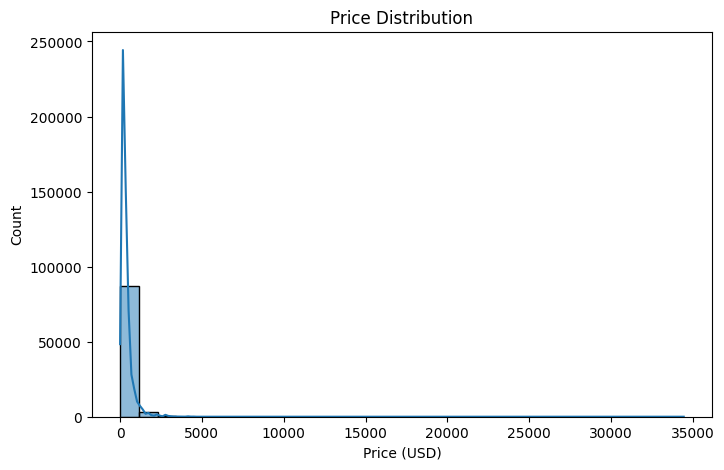

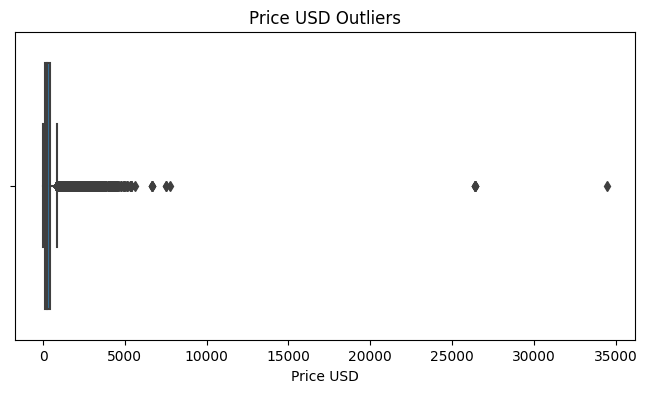

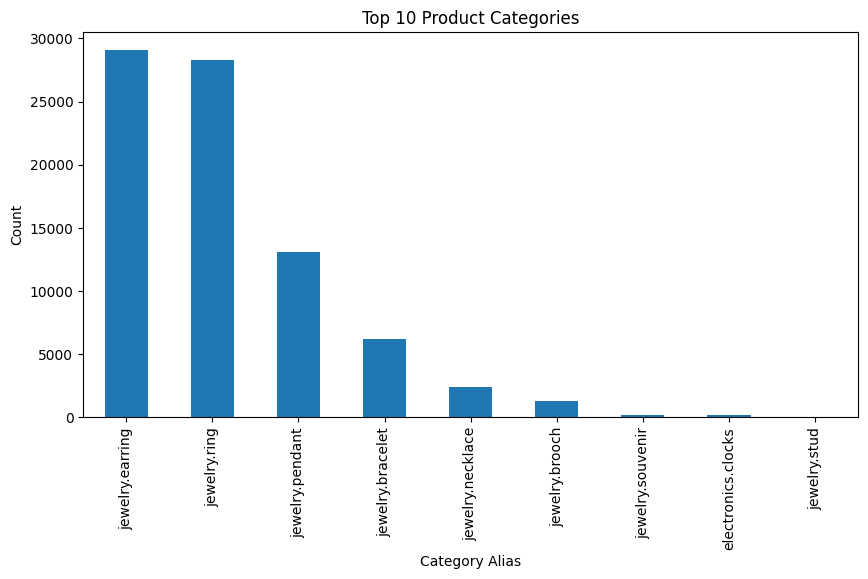

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


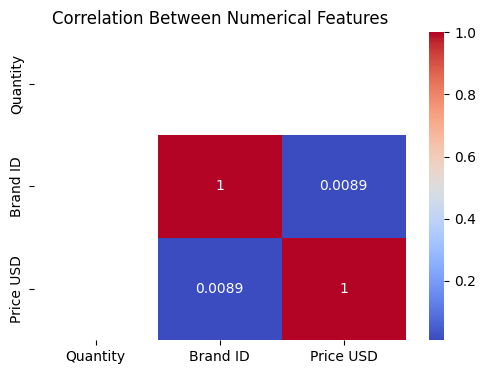

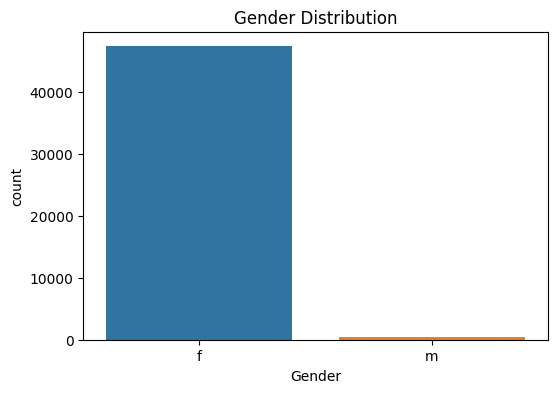

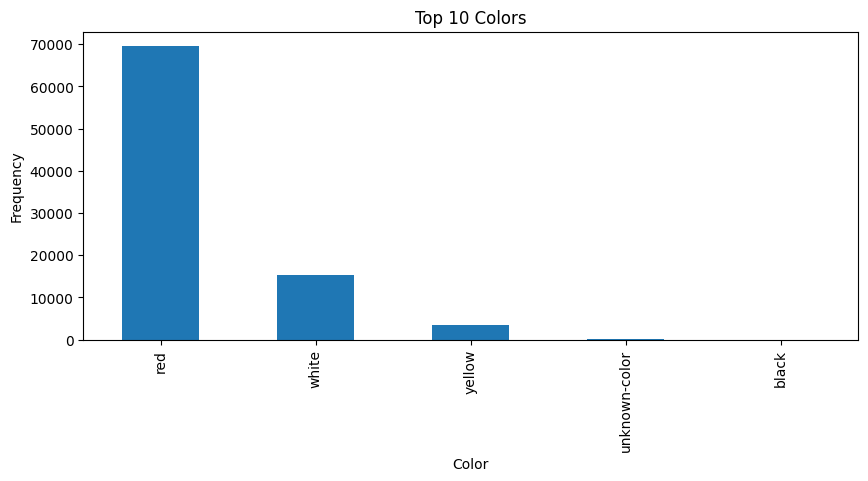

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (no header in file)
df = pd.read_csv('/kaggle/input/ecommerce-purchase-history-from-jewelry-store/jewelry.csv', header=None)

# Assign column names
df.columns = [
    'Order Datetime', 'Order ID', 'Product ID', 'Quantity',
    'Category ID', 'Category Alias', 'Brand ID', 'Price USD',
    'User ID', 'Gender', 'Color', 'Material', 'Gemstone'
]

# Convert datetime column
df['Order Datetime'] = pd.to_datetime(df['Order Datetime'], errors='coerce')

# Check missing values
print("Missing values:\n", df.isnull().sum())

# Basic statistics
print("\nSummary Statistics:\n", df.describe(include='all'))

# Drop rows with missing crucial data
df.dropna(subset=['Price USD', 'Quantity'], inplace=True)

# Visualize Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Price USD'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price (USD)')
plt.show()

# Boxplot to detect outliers in Price
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Price USD'])
plt.title('Price USD Outliers')
plt.show()

# Top Categories by count
plt.figure(figsize=(10,5))
df['Category Alias'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Product Categories')
plt.xlabel('Category Alias')
plt.ylabel('Count')
plt.show()

# Correlation Heatmap
num_cols = ['Quantity', 'Brand ID', 'Price USD']
plt.figure(figsize=(6,4))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Features')
plt.show()

# Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

# Color Distribution
plt.figure(figsize=(10,4))
df['Color'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Colors')
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_36/4198226707.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_36/4198226707.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_la

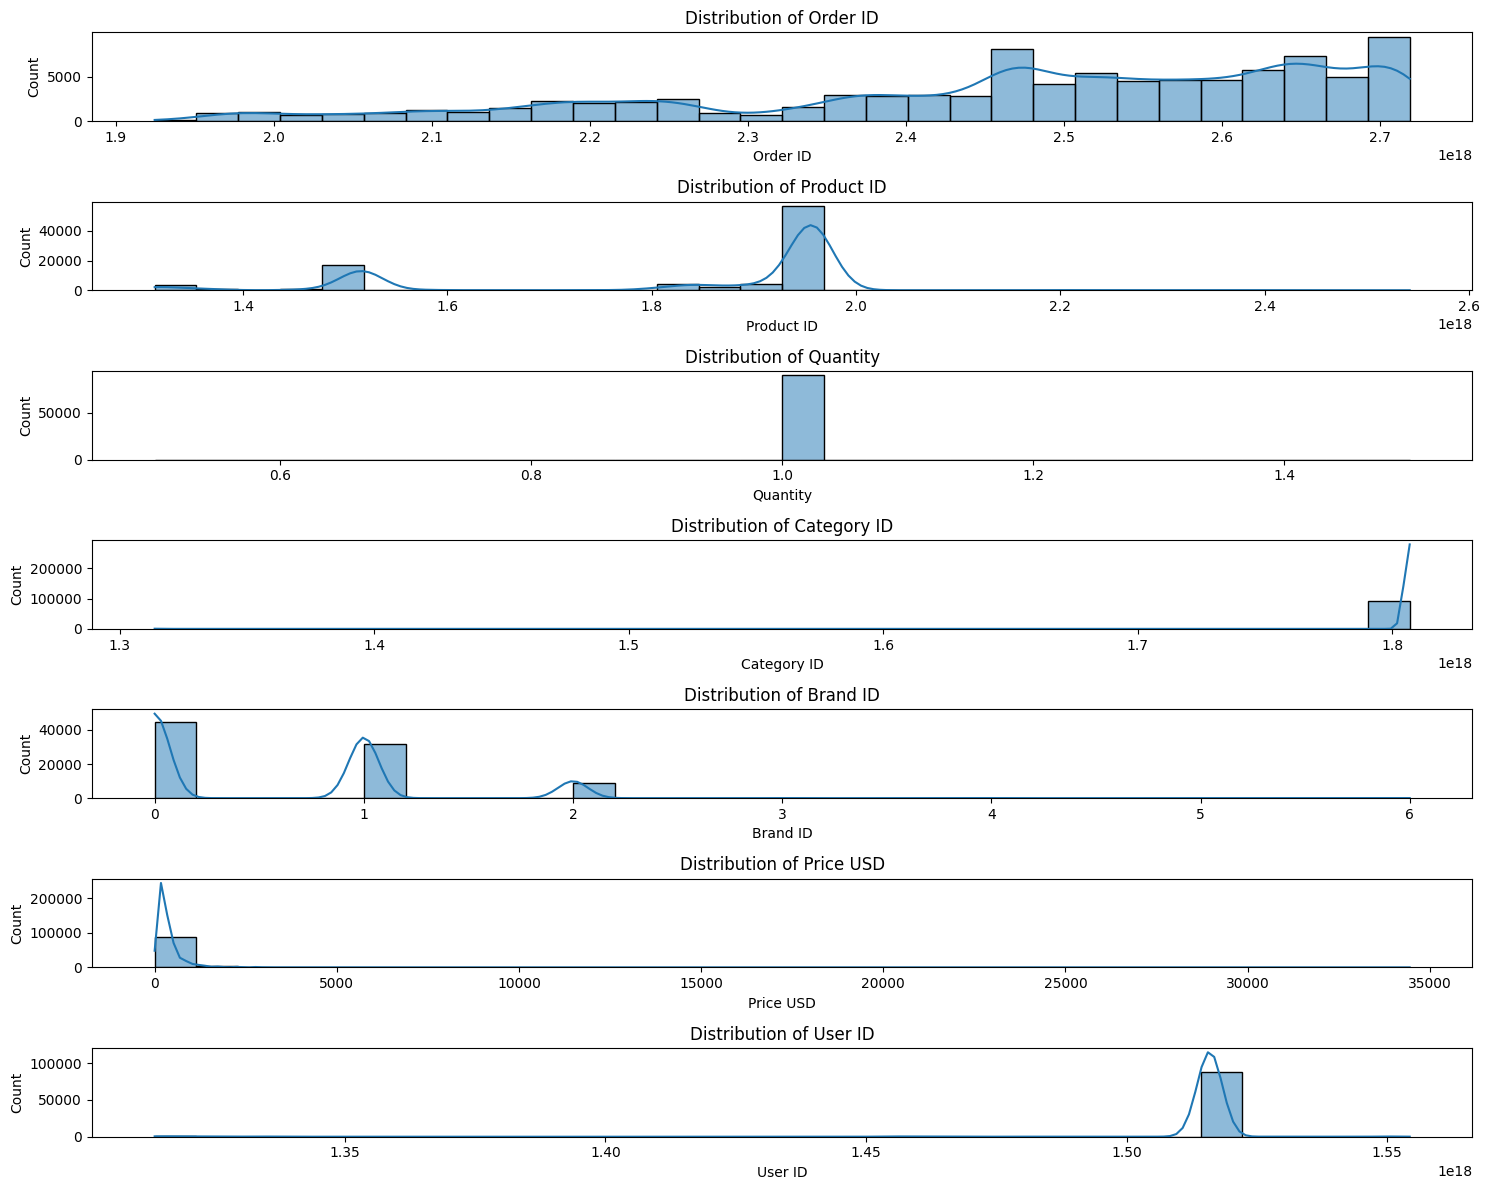

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Plot distribution for each numeric column
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.tight_layout()

plt.show()
